## 离群点检测 信用卡欺诈检测

### 1. 读取数据 
`creditcard-data.csv`

In [31]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('creditcard_data.csv')

### 2. 检查数据，提取异常，分析数据分布 
* 预处理. For example, remove NaN data
* 观察数据统计信息
* 观察和解释数据协方差矩阵

In [32]:
# 统计正常值和异常值的个数
normal_count = data['Class'].value_counts()[0]
fraud_count = data['Class'].value_counts()[1]

print('正常值个数:', normal_count)
print('异常值个数:', fraud_count)

# 分析正常值和异常值的特征
normal_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

normal_data_mean = normal_data.mean()
fraud_data_mean = fraud_data.mean()

print('正常值的特征:')
print(normal_data_mean)
print('异常值的特征:')
print(fraud_data_mean)

# 计算数据协方差矩阵
cov_matrix = np.cov(data, rowvar=False)
print('协方差矩阵:')
print(cov_matrix)

正常值个数: 284314
异常值个数: 492
正常值的特征:
Time      94837.928076
V1            0.008260
V2           -0.006270
V3            0.012168
V4           -0.007858
V5            0.005453
V6            0.002421
V7            0.009631
V8           -0.000986
V9            0.004465
V10           0.009827
V11          -0.006572
V12           0.010832
V13           0.000190
V14           0.012065
V15           0.000161
V16           0.007165
V17           0.011537
V18           0.003887
V19          -0.001177
V20          -0.000646
V21          -0.001236
V22          -0.000027
V23           0.000068
V24           0.000182
V25          -0.000070
V26          -0.000086
V27          -0.000295
V28          -0.000131
Amount       88.290570
Class         0.000000
dtype: float64
异常值的特征:
Time      80746.806911
V1           -4.771948
V2            3.623778
V3           -7.033281
V4            4.542029
V5           -3.151225
V6           -1.397737
V7           -5.568731
V8            0.570636
V9           -2.581123
V

可视化

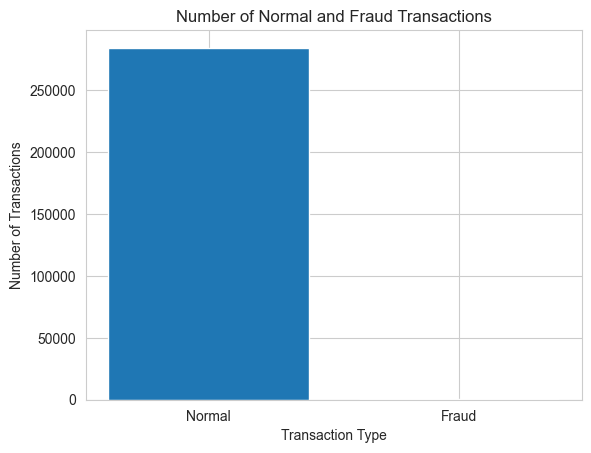

In [33]:
# 绘制柱状图
plt.bar(['Normal', 'Fraud'], [normal_count, fraud_count])
plt.title('Number of Normal and Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

正常值数量:  284314
异常值数量:  492
正常值特征列表:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
异常值特征列表:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


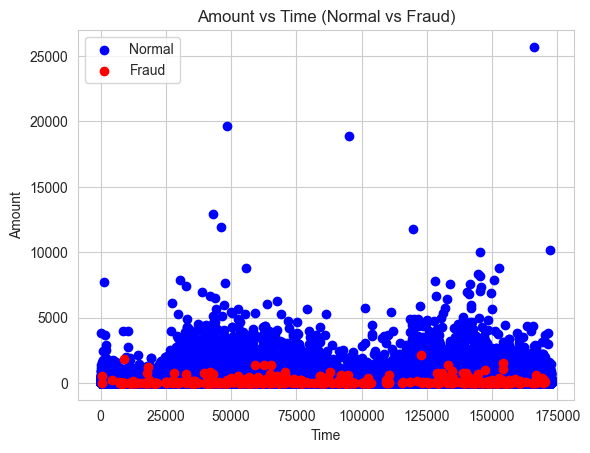

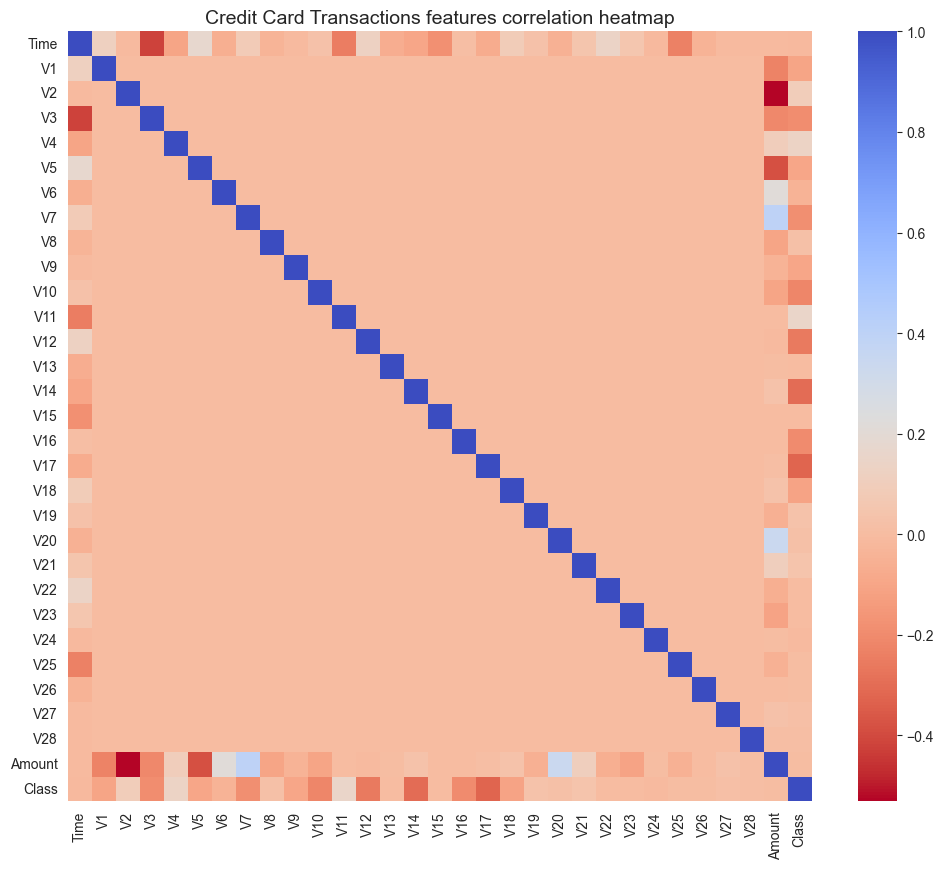

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('creditcard_data.csv')

# 分离正常值和异常值
normal_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

# 正常值和异常值数量
num_normal = len(normal_data)
num_fraud = len(fraud_data)

print("正常值数量: ", num_normal)
print("异常值数量: ", num_fraud)

# 正常值和异常值特征列表
normal_features = normal_data.iloc[:, :-1].columns.tolist()
fraud_features = fraud_data.iloc[:, :-1].columns.tolist()

print("正常值特征列表: ", normal_features)
print("异常值特征列表: ", fraud_features)

# 绘制正常值和异常值的散点图
plt.scatter(normal_data['Time'], normal_data['Amount'], color='blue', label='Normal')
plt.scatter(fraud_data['Time'], fraud_data['Amount'], color='red', label='Fraud')
plt.title('Amount vs Time (Normal vs Fraud)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

# 绘制数据集的热力图
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Credit Card Transactions features correlation heatmap", fontsize=14)
plt.show()


### 3. 采样数据，减少样本

In [35]:
from sklearn.cluster import KMeans

# 加载数据集
data = pd.read_csv('creditcard_data.csv')

# 只选择特征V1到V28
X = data.iloc[:, 1:29].values

# 对特征进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 使用K均值聚类
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# 选择每个聚类的中心作为采样样本
sample_indices = []
for i in range(10):
    centroid = kmeans.cluster_centers_[i]
    dist = np.sum((X - centroid)**2, axis=1)
    sample_indices.append(np.argmin(dist))

# 从原始数据集中选择采样样本
sample_data = data.iloc[sample_indices, :]

# 输出采样样本与原始数据集的正常值和欺诈值的数量
print("Original Data:\n", data['Class'].value_counts())
print("\nSampled Data:\n", sample_data['Class'].value_counts())


Original Data:
 0    284314
1       492
Name: Class, dtype: int64

Sampled Data:
 0    10
Name: Class, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 读入数据集
data = pd.read_csv('creditcard_data.csv')

# 将数据集分为欺诈和非欺诈两类
fraud_data = data[data['Class'] == 1]
normal_data = data[data['Class'] == 0]

# 对非欺诈数据进行随机采样，使得样本平衡
normal_data_sample = normal_data.sample(n=len(fraud_data), random_state=42)

# 合并欺诈和非欺诈数据
data_sampled = pd.concat([fraud_data, normal_data_sample], axis=0)

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_sampled.drop('Class', axis=1), data_sampled['Class'], test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(787, 30)
(787,)
(197, 30)
(197,)


### 5. 建立预测模型
* One-class SVM
* 局部离群因子（LOF）

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [38]:
# 对特征数据进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# 使用One-class SVM算法进行异常检测
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# 对测试集进行预测
y_pred = clf.predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('One-class SVM:')
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))

One-class SVM:
Accuracy score: 31.47%
Recall score: 20.88%
F1 score: 16.80%


E:\SOFTWARE\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# 使用LOF算法进行异常检测
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = clf.fit_predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('LOF:')
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))


LOF:
Accuracy score: 49.24%
Recall score: 32.66%
F1 score: 22.00%


E:\SOFTWARE\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. 评价模型预测结果

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# 读入数据集
data = pd.read_csv('creditcard_data.csv')

# 分离特征和标签
X = data.drop('Class', axis=1)
y = data['Class']

# 对样本进行下采样
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print('X_Train:\t{}'.format(X_train.shape))
print('X_Test:\t{}'.format(X_test.shape))
print('Y_Train:\t{}'.format(y_train.shape))
print('Y_Test:\t{}'.format(y_test.shape))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


X_Train:	(787, 30)
X_Test:	(197, 30)
Y_Train:	(787,)
Y_Test:	(197,)


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# 使用One-class SVM算法进行异常检测
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# 对测试集进行预测
y_pred = clf.predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('One-class SVM:')
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))

# 使用LOF算法进行异常检测
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = clf.fit_predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('LOF:')
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))


One-class SVM:
Accuracy score: 2.36%
Recall score: 1.60%
F1 score: 3.05%
LOF:
Accuracy score: 49.32%
Recall score: 33.33%
F1 score: 22.17%


E:\SOFTWARE\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\SOFTWARE\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7. 讨论。考虑更多的模型，并比较不同模型的差异。

In [46]:
from sklearn.ensemble import IsolationForest

# 减少样本并拆分数据集
data = pd.read_csv('creditcard_data.csv')
# 将数据集分为欺诈和非欺诈两类
fraud_data = data[data['Class'] == 1]
normal_data = data[data['Class'] == 0]

# 对非欺诈数据进行随机采样，使得样本平衡
normal_data_sample = normal_data.sample(n=len(fraud_data), random_state=42)

# 合并欺诈和非欺诈数据
data_sampled = pd.concat([fraud_data, normal_data_sample], axis=0)

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data_sampled.drop('Class', axis=1), data_sampled['Class'], test_size=0.2, random_state=42)

# 对特征数据进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建并训练模型
clf = IsolationForest(n_estimators=10, max_samples=len(X_train), contamination=0.01, random_state=42)
clf.fit(X_train)

# 对测试集进行预测
y_pred = clf.predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))


Accuracy score: 49.24%
Recall score: 32.66%
F1 score: 22.00%


E:\SOFTWARE\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from pyod.models.hbos import HBOS

# 减少样本并拆分数据集
data = pd.read_csv('creditcard_data.csv')
data = data.sample(frac=0.1, random_state=42)
X = data.drop(['Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建并训练模型
clf = HBOS(contamination=0.01)
clf.fit(X_train)

# 对测试集进行预测
y_pred = clf.predict(X_test)

# 计算模型的准确率、召回率和F1-score
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('Recall score: {:.2f}%'.format(recall_score(y_test, y_pred, average='macro') * 100))
print('F1 score: {:.2f}%'.format(f1_score(y_test, y_pred, average='macro') * 100))


Accuracy score: 50.76%
Recall score: 51.01%
F1 score: 35.43%
